# Exercise 1.1

We wish to compute
$$k_{r,s}^{(i)} = \int_{x_i}^{x_{i+1}}(N_r^{(i)})$$

    ...

We have
$$ k_{1,1} = \int_{x_i}^{x_{i+1}} \frac{1}{h_i^2} + \left(1 - \frac{x-x_i}{h_i}\right)^2\,dx $$
and by substitution $y=\frac{x-x_{i}}{h_i}$ we obtain

$$ k_{1,1} = \int_{0}^{1} \frac{1}{h_i} + h_i\left(1 - y\right)^2\,dy $$

and using $\left(-\frac{1}{3}(1-y)^3\right)' = (1-y)^2$ we obtain

$$ k_{1,1} = \left[ \frac{y}{h_i} \right]_{0}^{1} + \left[ -\frac{h_i}{3}(1-y)^3 \right]_{0}^{1} = \frac{1}{h_i} + \frac{h_i}{3}$$


Next
$$ k_{2,2} = \int_{x_i}^{x_{i+1}} \frac{1}{h_i^2} + \left(\frac{x-x_i}{h_i}\right)^2\,dx $$
and substituting $y=\frac{x-x_{i}}{h_i}$ again we obtain

$$ k_{2,2} = \int_{0}^{1} \frac{1}{h_i} + h_i y^2\,dy $$

and thus

$$ k_{2,2} = \left[ \frac{y}{h_i} \right]_{0}^{1} + \left[\frac{h_i}{3}y^3 \right]_{0}^{1} = \frac{1}{h_i} + \frac{h_i}{3}$$


And finally
$$ k_{1,2} = \int_{x_i}^{x_{i+1}} -\frac{1}{h_i^2} + \left(1-\frac{x-x_i}{h_i}\right)\left(\frac{x-x_i}{h_i}\right)\,dx $$

so substitution and previously we have

$$ k_{1,2} = \int_{0}^{1} -\frac{1}{h_i} + h_i\left(y-y^2\right)\,dy $$

and thus

$$ k_{1,2} = \left[ -\frac{y}{h_i} \right]_{0}^{1} + h_i\left[\frac{1}{2}y^2 - \frac{1}{3}y^3 \right]_{0}^{1} = -\frac{1}{h_i} + \frac{h_i}{6}$$


It follows by equation 1.21 in the notes that
\begin{align*}
\hat{u}_1 &= c = 1 \\
\hat{u}_3 &= d = e^2
\end{align*}
and from equation 1.22 we get
\begin{align*}
\hat{u}_2 = \frac{-(a_{2,1}\hat{u}_1 + a_{2,3} \hat{u}_3)}{a_{2,2}}
\end{align*}
We find a coefficients by equation 1.28
\begin{align*}
a_{2,1} &= k_{2,1}^{(1)} = \frac{-1}{h_1} + \frac{h_1}{6}\\[10pt]
a_{2,3} &= k_{1,2}^{(2)} = \frac{-1}{h_2} + \frac{h_2}{6}\\[10pt]
a_{2,2} &= k_{2,2}^{(1)} + k_{1,1}^{(2)} = \frac{1}{h_1} + \frac{h_1}{3} + \frac{1}{h_2} + \frac{h_2}{3} = \frac{1}{h_1} + \frac{1}{h_2} + \frac{h_1 + h_2}{3}
\end{align*}
In the non-uniform case we get
\begin{align*}
\hat{u}_2 = - \frac{ \left(\frac{-1}{h_1} + \frac{h_1}{6} \right) + \left( \frac{-1}{h_2} + \frac{h_2}{6} \right) e^2 }{\frac{1}{h_1} + \frac{1}{h_2} + \frac{h_1 + h_2}{3}}
\end{align*}
in the uniform case $h_1=h_2=h$ this reduces to
\begin{align*}
\hat{u}_2 = - \left(\frac{-1}{h} + \frac{h}{6} \right) \frac{1+e^2}{ \frac{2}{h} + \frac{2h}{3} }
\end{align*}

c) and d)

In [5]:
import numpy as np
from matplotlib import pyplot as plt

$c_1 = 1, c_2 = 0$

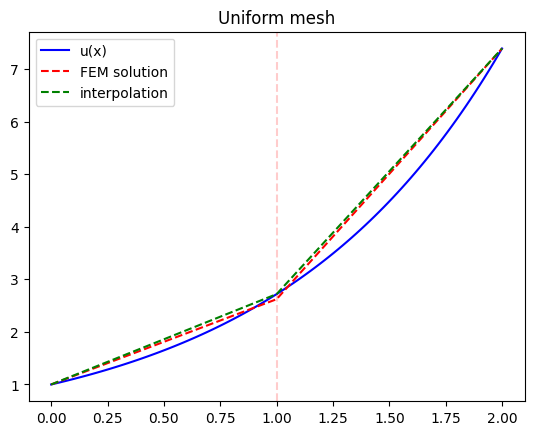

In [39]:
L = 2
c = 1
d = np.exp(2)

K = lambda h: np.array([[1/h + h/3, -1/h + h/6], [-1/h + h/6, 1/h + h/3]])
u = lambda x: np.exp(x)

def uhat(u1,u3,h1,h2):
    K1 = K(h1)
    K2 = K(h2)
    a21 = K1[1,0]
    a23 = K2[0,1]
    a22 = K1[1,1] + K2[0,0]

    return -(a21*u1+a23*u3)/(a22)

# True values
x = np.linspace(0, L, 100)
plt.plot(x, u(x), 'b-',label="u(x)")

# For uniform mesh:
xunif = [0, L/2, L]
yunif = [c, uhat(c,d,L/2,L/2), d]
plt.plot(xunif, yunif, 'r--',label="FEM solution")
plt.axvline(L/2, 0, L,alpha=0.2,color='red',linestyle='--')


# interpolation mesh:
xI = [0, L/2, L]
yI = [c, u(1), d]
plt.plot(xI, yI, 'g--',label="interpolation")

plt.title("Uniform mesh")
plt.legend()
plt.show()

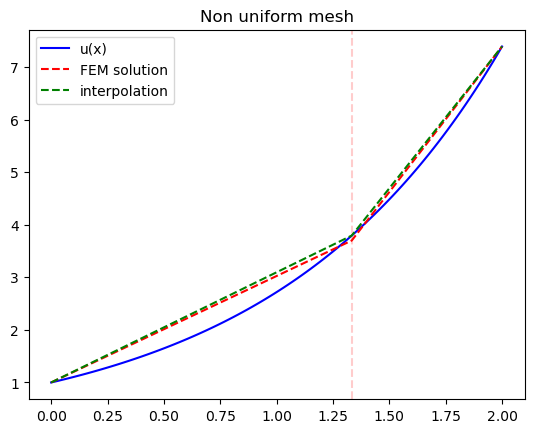

In [9]:
# True values
x = np.linspace(0, L, 100)
plt.plot(x, u(x), 'b-',label="u(x)")

# non uniform mesh:
xnunif = [0, 2*L/3, L]
ynunif = [c, uhat(c,d,2*L/3,L/3), d]
plt.plot(xnunif, ynunif, 'r--',label="FEM solution")

plt.axvline(2*L/3, 0, L,alpha=0.2,color='red',linestyle='--')

# interpolation mesh:
xI = [0, 2*L/3, L]
yI = [c, u(2*L/3), d]
plt.plot(xI, yI, 'g--',label="interpolation")


plt.title("Non uniform mesh")
plt.legend()
plt.show()

e)
Difference: We see that although the interpolation is exact in the nodes, the FEM solution is generally closer to $u(x)$.
The interpolation is defined to be exact in the nodes, the FEM solution is defined to satisfy the weak form of the boundary value problem in the nodes. 

f) We have found there are 5 steps:
>   1. Convert to boundary value problem (strong form) to weak formulation (weak form).
>   2. Discretize the domain and define corresponding basis functions.
>   3. Calculate the element matrix $K_i$
>   4. Setup linar equation system
>   5. Solve

# 1.2

In [40]:
from scipy.sparse import diags
import scipy as sp
import numpy as np

def BVP1D(L, c, d, x):
    M = len(x)
    lowerdiag = np.zeros(M-1)
    diag = np.zeros(M)

    for i in range(M-1):
        h = x[i+1] - x[i]
        Ki = K(h)
        lowerdiag[i] = Ki[0,1]
        diag[i] += Ki[0,0]
        diag[i+1] = Ki[1,1]
    
    diagonals = [lowerdiag, diag, lowerdiag]
    A = diags(diagonals, [-1, 0, 1]).toarray()

    #impose boundary conditions
    b = np.zeros(M)

    b[0] = c
    b[1] -= A[0,1]*c

    A[0,0] = 1
    A[0,1] = 0
    
    b[M-1] = d
    b[M-2] -= A[M-1,M-2]*d

    A[M-1,M-1] = 1
    A[M-1,M-2] = 0

    #solve system
    # U = sp.linalg.cholesky(A)
    # u = sp.linalg.solve_triangular(U.T, b, lower=True)
    # u = sp.linalg.solve_triangular(U, u, lower=False)
    u = np.linalg.solve(A,b)

    return u, A, b


In [41]:
L = 2
c = 1
d = np.exp(2)

BVP1D(L, c, d, [0, L/2, L])

(array([1.        , 5.24316006, 7.3890561 ]),
 array([[ 1.        ,  0.        ,  0.        ],
        [-0.83333333,  2.66666667, -0.83333333],
        [ 0.        ,  0.        ,  1.        ]]),
 array([1.        , 6.99088008, 7.3890561 ]))